In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[ -2.59562282,  -9.13800427],
       [ -9.28533723,  -1.30004537],
       [ -3.67137291,  -8.43432641],
       ...,
       [ -1.56891581,  -9.4473723 ],
       [-10.15555411,   0.35870024],
       [  0.5848417 ,  -3.06165732]], shape=(1000, 2))

In [5]:
y


array([2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0,
       2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1,
       0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0,
       2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1,
       0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1,
       2, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0,
       1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1,

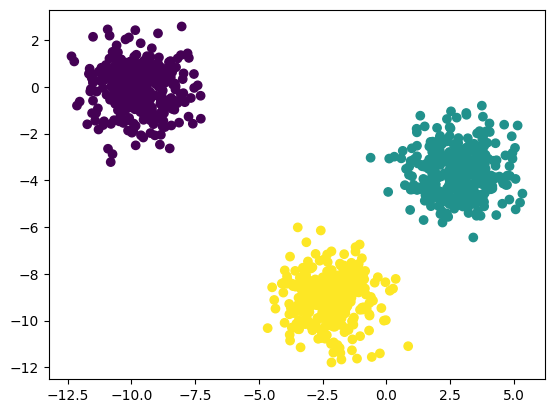

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1339.999999999999,
 402.25489609637026,
 70.93487267871629,
 59.30415924253985,
 49.56888145225336,
 49.07414262218503,
 42.306267017909356,
 33.97198531212071,
 31.16289939744915,
 28.258599505776154]

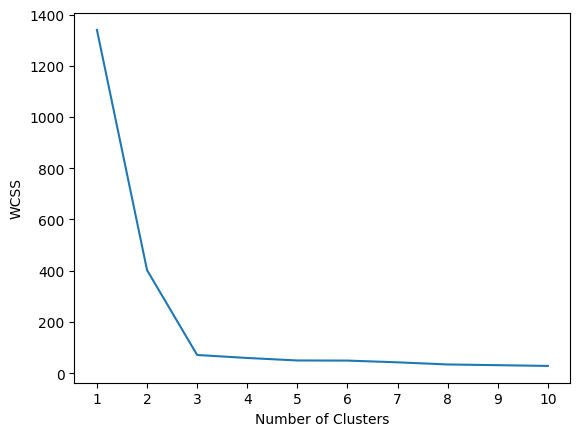

In [14]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

array([0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0,
       1, 0, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1,
       1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2,
       2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0,
       1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2,

In [17]:
y_pred=kmeans.predict(X_test_scaled)

In [18]:

y_pred

array([0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2,
       0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1,
       0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2,
       2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0,
       0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2,
       2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2,
       2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2,

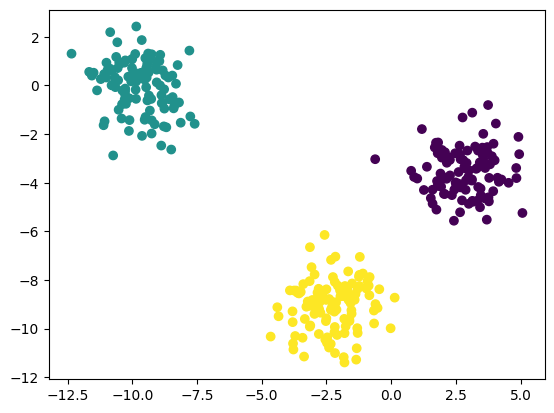

In [19]:

plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [20]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [21]:

## kneelocator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [23]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [24]:
kl.elbow

np.int64(3)

In [25]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [27]:

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [28]:
silhouette_coefficients

[np.float64(0.6786480035488273),
 np.float64(0.7884638530797603),
 np.float64(0.6476095531678687),
 np.float64(0.5252169645471441),
 np.float64(0.37367135237049365),
 np.float64(0.36280476867981865),
 np.float64(0.3543188343090306),
 np.float64(0.3377781909977717),
 np.float64(0.35394693502772895)]

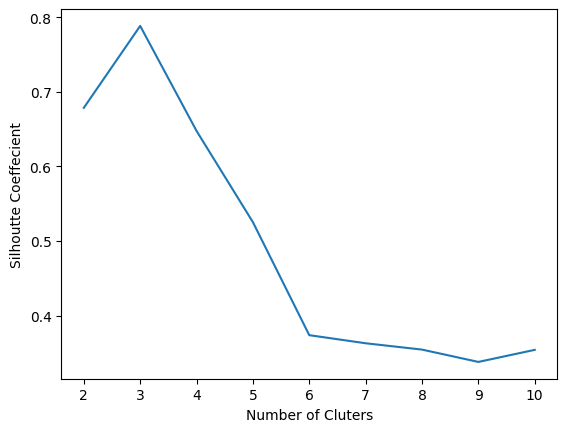

In [29]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()